# Challenge 3

In [1]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Import the titanic file. Name your dataset `titanic`.

In [2]:
titanic = pd.read_csv('./titanic.csv',low_memory=False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes

In [3]:
#your code here

titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [4]:
# your code here- numerical variable

titanic.select_dtypes(exclude = object).head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500


In [5]:
#your code here- categorical variable

titanic.select_dtypes(exclude = ['int','float']).head()

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S


#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

In [6]:
# your code here

plt.style.use('classic')
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_style('whitegrid')

#### Use the appropriate visulalization to show the distribution of the column `Age`

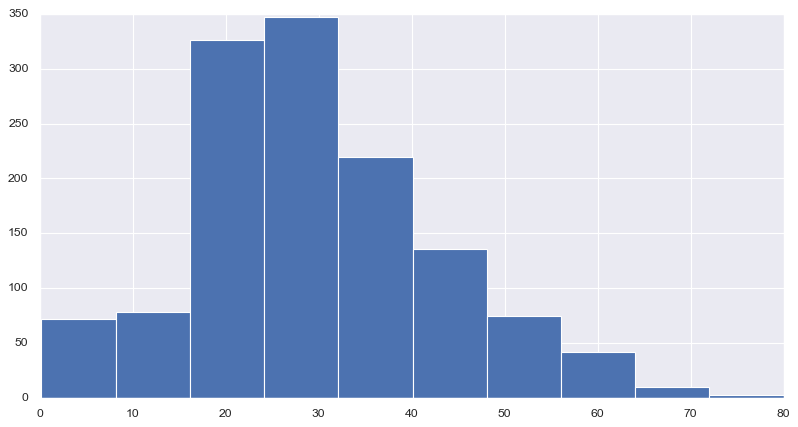

In [73]:
# your code here

titanic['Age'].hist(bins=10)

#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

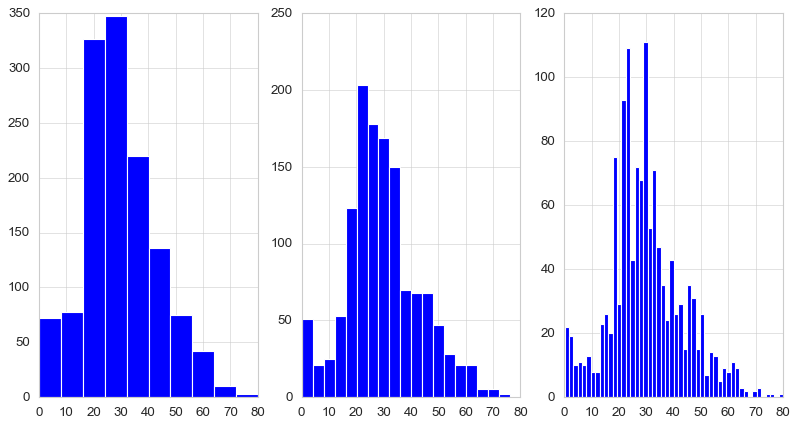

In [8]:
# your code here

plt.subplot(1,3,1)
titanic['Age'].hist(bins=10)
plt.subplot(1,3,2)
titanic['Age'].hist(bins=20)
plt.subplot(1,3,3)
titanic['Age'].hist(bins=50)

#### Whether the bin size affects your plot? Why?

In [9]:
#your comment here

#Los bins más pequeños hacen que se distribuya la frecuencia más veces, en más columnas (normalmente de forma innecesaria), incluso puede que
#cueste leer más los datos al estar estos separados.
#Los bins grandes pueden también cargarse los datos al ser más generalistas.
#Es muy importante elegir el tamaño adecuado de los bins.


#### Use seaborn to show the distribution of the column `Age`

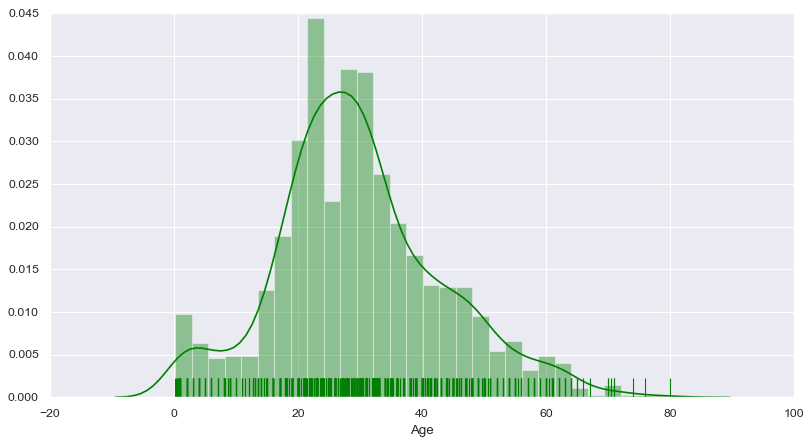

In [32]:
# your code here

sns.set(color_codes=True)

sns.distplot(titanic['Age'], bins=30, color='green', rug=True)

#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

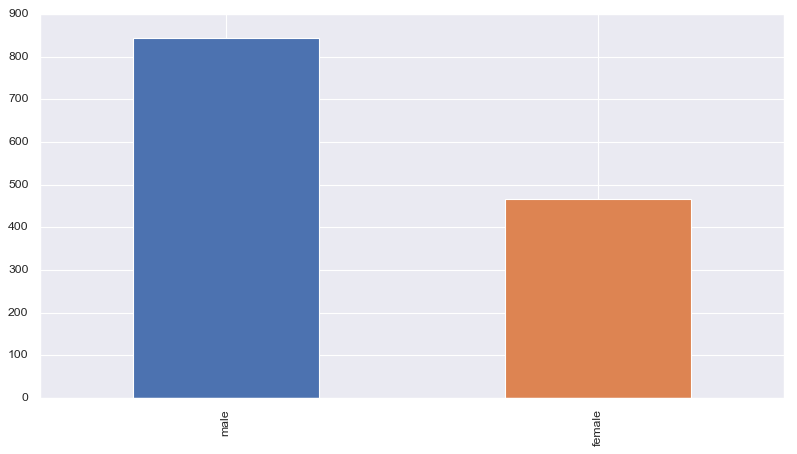

In [77]:
# your code here- 1st way

#titanic['Gender'].plot(kind = bar) 
#Esto no me lo deja hacer porque no se puede plot en bars algo que no es numeric data (es string). Hay que hacer un 
#value_counts() para que cuente la frecuencia de Male y de Female, y eso sí que lo puede representar en bars.

titanic['Gender'].value_counts().plot(kind = 'bar')

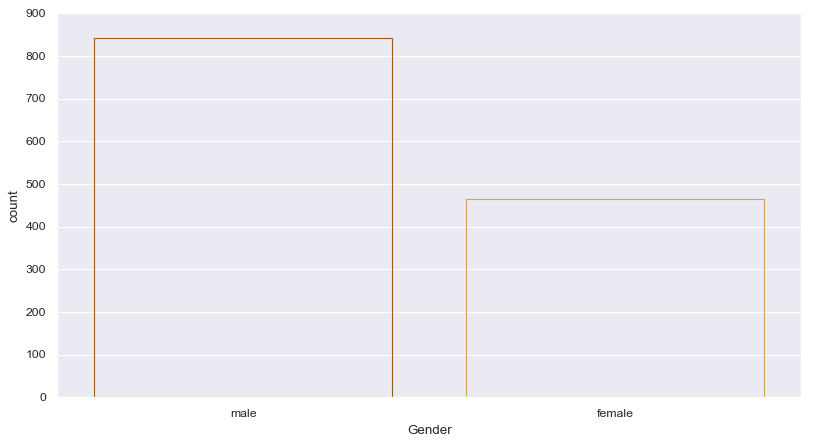

In [81]:
# your code here- 2nd way

sns.countplot(titanic['Gender'], facecolor=(1, 0.9, 1, 0), edgecolor=sns.color_palette("BrBG", 7))

#### Use the appropriate plot to visualize the column `Pclass` 


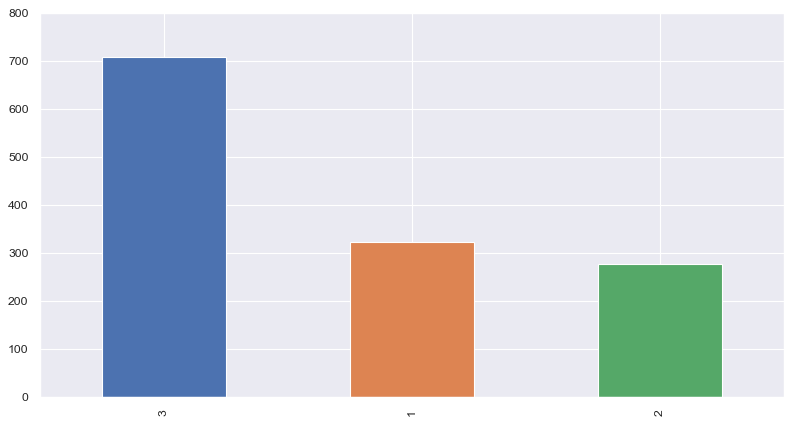

In [53]:
# your code here

titanic['Pclass'].value_counts().plot(kind = 'bar')

#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

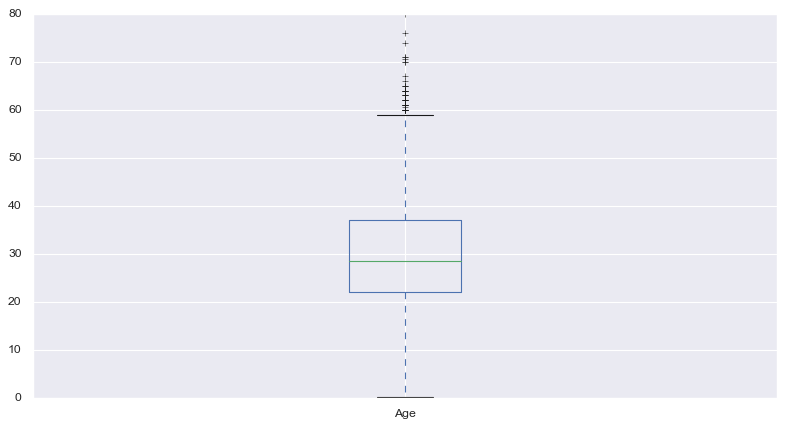

In [58]:
# your code here

#titanic.describe()

titanic.boxplot('Age')


#### What does the previous plot tell you about the feature `Age`? Comment.

In [15]:
# your comment here

#El box plot nos da muchos datos: 
#El mínimo y el máximo: el mínimo es 0, el máximo es 59 (más o menos)
#Entre medias tenemos el range: 59-0 = 59
#También nos da el IQR (Inter Quartile Range), que comprende el cuadrito del medio (de 22 a 38)
#Por último la mediana (el valor del centro con los datos ordenados), que es la línea que divide el cuadrado, está en 29
#Es curiso ver cómo los outliers (o gente de más de 60 años) te los dibuja fuera del máximo (no los tiene en cuenta).



#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

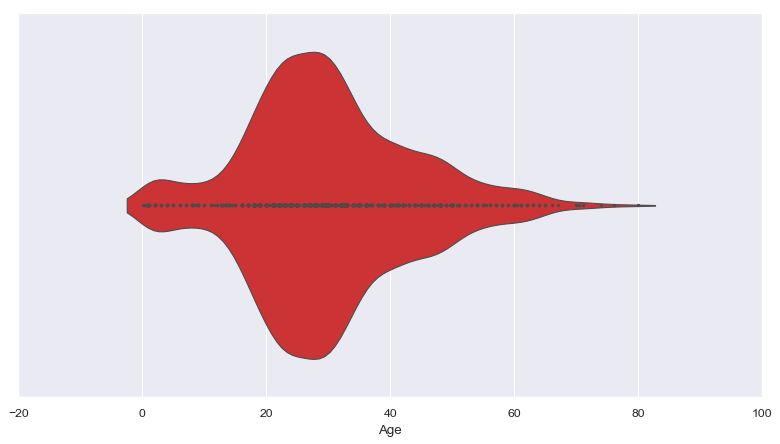

In [68]:
#your code here

sns.violinplot('Age', data=titanic, palette="Set1", bw=.2, cut=1, linewidth=1, inner="points")

#### What additional information in the previous plot provide you about the feature `Age`? Comment.

In [17]:
#your comment here

#El violin plot es más visual para comparar las frecuencias de edades, y, aunque tiene los outliers dentro (los cuentan
#como máximo), se ve muy bien la edad de la mayoría de la gente en el Titanic (entre 25 y 35 años).


#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

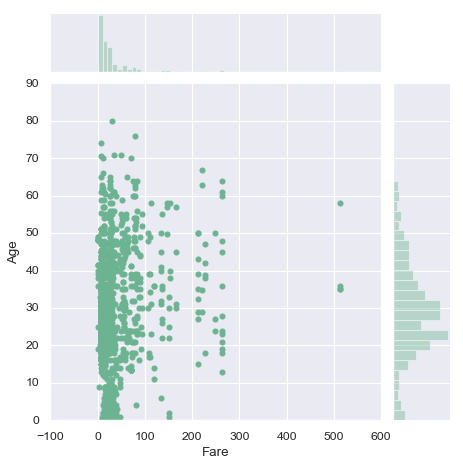

In [70]:
#your code-1st way

sns.jointplot(x = 'Fare', y = 'Age', data = titanic, color="#6CB491")

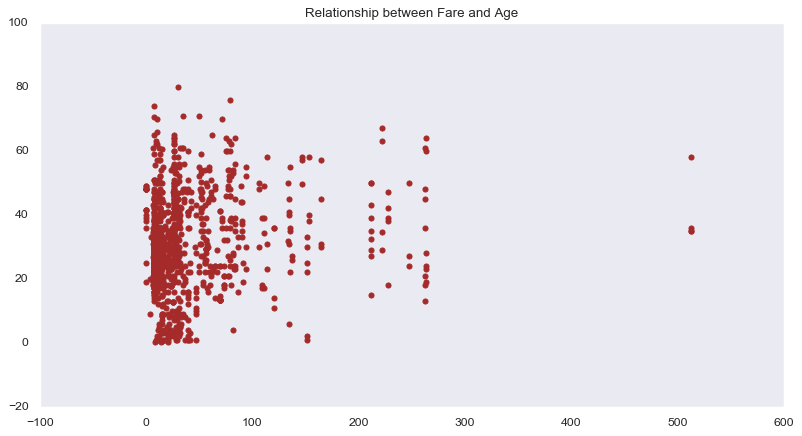

In [93]:
# your code-2nd way

#fare_age_relation = titanic.groupby(["Fare"]).agg(('Age'))

plt.scatter(x = 'Fare', y = 'Age', data = titanic, color="brown")
#plt.ylabel("Age")
#plt.xlabel("Fare")
plt.title("Relationship between Fare and Age")
plt.grid()

#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

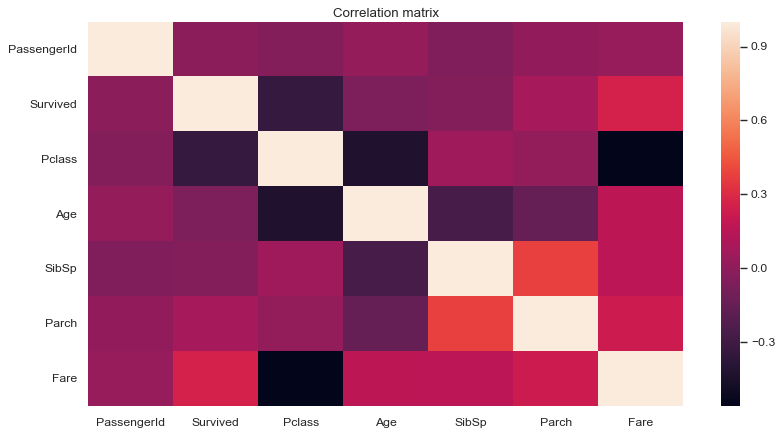

In [96]:
#your code here

sns.heatmap(titanic.corr())
sns.set_palette("husl")
plt.title('Correlation matrix')
plt.savefig('corr_matrix_titanic.png',bbox_inches='tight')

#### According to the previous plot, what are the most correlated feature? Comment.

In [21]:
#your comment here

#Pclass y Fare tienen una negative correlation muy fuerte, cuando una sube la otra baja
#También Pclass y Age
#También Pclass y Survived, los ricos eran los primeros en montarse en los botes, esto es la triste realidad (sale en la peli)!
#Además, Fare y Survived tienen una positive correlation, tiene sentido 



#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

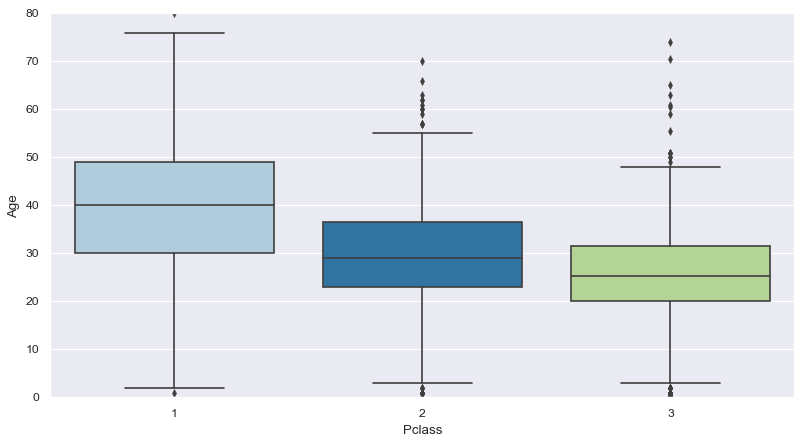

In [98]:
#your code here

sns.boxplot(x='Pclass',y='Age',data=titanic, palette="Paired")

#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

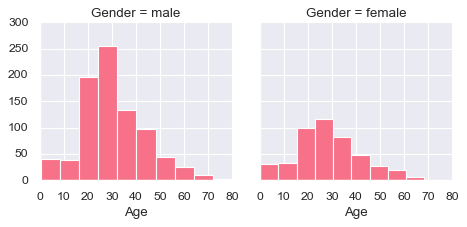

In [101]:
#your code here

#Esto es muy guay!!
gender = sns.FacetGrid(data=titanic, col='Gender')
gender.map(plt.hist,'Age')
